## Agenda
- Dimensionality Reduction Techniques:
  - Importance
  - PCA - Principal Component Analysis
  - LDA - Linear Discriminant Anlaysis
  - t-SNE  - t- Distributed Stochastic Neighbor Embedding
- Association Rule Learning
  - Apriori
  - Eclat
- Anamoly Detection
   - Isolation Forest

## Dimensionality Reduction Techniques

Dimensionality reduction involves decreasing the number of features (or dimensions) in a dataset while preserving as much information as possible. This technique is used for various purposes, such as simplifying a model, enhancing the performance of a learning algorithm, or making the data easier to visualize.

### Importance:
Dimensionality reduction is important because it:
1. **Improves computational efficiency:** Reduces the computational cost for data processing and model training.
2. **Mitigates the curse of dimensionality:** Simplifies data to prevent overfitting and sparsity issues.
3. **Reduces noise in data:** Eliminates irrelevant or noisy features to enhance model performance.
4. **Enhances data visualization:** Makes high-dimensional data easier to visualize in 2D or 3D.
5. **Boosts model performance:** Focuses on the most relevant features for better accuracy.
6. **Saves storage and memory:** Decreases the amount of storage and memory needed for large datasets.
7. **Increases model interpretability:** Simplifies models, making them easier to understand and explain.
8. **Avoids multicollinearity:** Addresses high correlation between features to improve regression models

### __Approaches of Dimensionality Reduction__

There are two ways to apply the dimension reduction technique, which are given below:
#### __Feature Selection__
Feature selection is the process of choosing a subset of relevant features and discarding irrelevant ones from a dataset to build a more accurate model. Essentially, it involves selecting the most optimal features from the input data.

Three methods are used for the feature selection:
- **Filter Methods:** this method involves filtering the dataset to retain only the relevant features.
  Common techniques include: Correlation, Chi-Square Test, and ANOVA
  
- **Wrapper Methods:** this method evaluates subsets of features using a machine learning model. Features are added or removed based on their impact on model performance. It is more accurate but also more complex than filter methods.
  Common techniques include: Forward Selection and Backward Selection.
- **Embedded Methods:** these methods evaluate the importance of features during the training process of the machine learning model.
  Common techniques include: LASSO, Elastic Net, and Ridge Regression

  
#### __Feature Extraction__
Feature extraction is the process of transforming high-dimensional data into a lower-dimensional space. This approach is useful for retaining essential information while using fewer resources for processing.

Some common feature extraction techniques are:
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique for dimensionality reduction in data analysis. It simplifies the complexity of high-dimensional data while preserving trends and patterns.

Principal Component Analysis (PCA) is an unsupervised learning technique used to preprocess datasets and reduce their dimensionality while preserving the original dataset.


- Dimensionality: It is the number of features present in the data.
- Correlation: It indicates the strength of the relationship between features. The correlation value ranges between -1 and +1. It is -1 when variables are inversely proportional and +1 when they are directly proportional.
- Orthogonality: Dimensionality reduction techniques often utilize orthogonality to maintain the independence of features when reducing the number of dimensions in a dataset.
- Covariance Matrix: It is a matrix containing the covariance between variables.
  *Variance* is a measure of the variability or spread of a single variable, indicating how much the values differ from the mean.
- Eigenvector: Given a square matrix $A$ and a nonzero vector $v$, and $v$ is the eigenvector if $Av$ (the result of applying matrix $A$ to $v$) is a scalar multiple of $v$, i.e. $Av$ = ${\lambda}v$ where ${\lambda}$ is the eigenvalue
- Eigenvalues: The scalar ${\lambda}$ associated with the eigenvector $v$
in the transformation $Av$ = ${\lambda}v$, indicating how much the eigenvector is scaled during the transformation. It represents the variance captured by each principal component, indicating their importance in explaining the data's variability.
- Principal component: Principal components are new variables created as linear combinations of the original variables, arranged to be uncorrelated and to compress most of the information into the initial components. In this way, from 10-dimensional data, PCA aims to maximize the information in the first component, then the next most in the second, and so on.

## Steps
1. Standardization
2. Covariance matrix computation
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a Feature vector
5. Recasting data along the principal component axes

*Standardization* adjusts the range of variables so that each one contributes equally, ensuring uniformity in their influence.
$$ Z = \frac{\text{Value} - \text{mean}}{\text{Standard deviation}} $$

This normalization process mitigates the dominance of variables with larger ranges over those with smaller values.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
df =  pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Step 1- Standardize the data

mean =  df.mean()
std = df.std()

Z =  (df - mean)/(std)

In [5]:
Z.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.159355e-15,-6.549730e-15,-6.993039e-16,-8.553985e-16,6.043984e-15,-1.111394e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.461046e-15,...,-2.297713e-15,1.735772e-15,-1.211294e-15,6.243785e-16,-5.094929e-15,-2.097912e-15,6.368661e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


In [6]:
## Calculate the Covariance Matrix

c =  Z.cov()
c

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [7]:
## Find the Eigenvalues and EigenVector

evals, evecs =  np.linalg.eig(c)

In [8]:
print(evals)

[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]


In [9]:
# Sort eigenvalue is descending order nd corresponding eigenvectors
idx =  evals.argsort()[::-1]
evals =  evals[idx]
evecs =  evecs[:, idx]

In [10]:
evals

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

In [11]:
# Calculate Explained Variance
explained_var =  np.cumsum(evals)/np.sum(evals)
explained_var


array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [12]:
pca_component =  np.sum((explained_var <=0.50))+1
pca_component

2

In [13]:
pca_cols =  evecs[:, :pca_component]

In [14]:
pca_cols.shape

(30, 2)

In [15]:
Z.shape

(569, 30)

In [16]:
pca =  Z @ pca_cols
pca

,0,1
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359
...,...,...
564,6.433655,-3.573673
565,3.790048,-3.580897
566,1.255075,-1.900624
567,10.365673,1.670540


In [17]:
PCA_data =  pd.DataFrame(data = pca)

In [18]:
PCA_data = PCA_data.rename(columns = {0:'PCA1', 1:'PCA2'})
PCA_data

,PCA1,PCA2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359
...,...,...
564,6.433655,-3.573673
565,3.790048,-3.580897
566,1.255075,-1.900624
567,10.365673,1.670540


In [19]:
from sklearn.decomposition import PCA

In [20]:
pca_model =  PCA(n_components = 2)

In [21]:
X_pca = pca_model.fit_transform(Z)

In [22]:
X_pca

array([[ 9.18475521,  1.94687003],
       [ 2.38570263, -3.76485906],
       [ 5.72885549, -1.07422859],
       ...,
       [ 1.25507494, -1.90062436],
       [10.36567336,  1.67054021],
       [-5.4704299 , -0.67004722]])

In [23]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

# Linear Discriminant Analysis

Linear discriminant analysis (LDA) is a technique used for dimensionality reduction and classification. It aims to project the data onto a lower-dimensional space in such a way that the separation between different classes is maximized. LDA focuses on finding a linear combination of features that best separate two or more classes of objects or events.

- LDA assumes the data follows a Gaussian distribution.
- It assumes that the covariance matrices of different classes are equal.
- It assumes the data is linearly separable, allowing for an accurate linear decision boundary to classify different classes.
- It can reduce the dimensionality of the data to a maximum of $𝑘 − 1$ components, where $k$ is the number of classes in the target variable.

In [24]:
# Implement LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [25]:
X =  df
y =  cancer.target

In [26]:
pd.Series(y).nunique()

2

In [27]:
lda = LDA(n_components = pd.Series(y).nunique() -1)

In [28]:
X_lda =  lda.fit_transform(X, y)

In [29]:
X_lda

array([[ 3.32392717e+00],
       [ 2.31910801e+00],
       [ 3.74742484e+00],
       [ 4.04854946e+00],
       [ 2.28115767e+00],
       [ 1.61150348e+00],
       [ 2.35653128e+00],
       [ 1.28122316e+00],
       [ 1.60828074e+00],
       [ 3.86266690e+00],
       [ 8.64980964e-01],
       [ 2.39981887e+00],
       [ 1.32670638e+00],
       [ 4.20145181e-01],
       [ 1.25084871e+00],
       [ 3.06625368e+00],
       [ 2.11049829e+00],
       [ 3.17780841e+00],
       [ 3.43796946e+00],
       [-2.23125867e-01],
       [-1.97973275e+00],
       [-2.46635453e+00],
       [ 1.79100127e+00],
       [ 3.02554197e+00],
       [ 3.87178737e+00],
       [ 3.99524140e+00],
       [ 2.74537482e+00],
       [ 2.57652189e+00],
       [ 3.07566630e+00],
       [ 8.02258881e-01],
       [ 3.41613522e+00],
       [ 2.67943316e+00],
       [ 3.63987363e+00],
       [ 3.07550539e+00],
       [ 2.68840028e+00],
       [ 2.57312945e+00],
       [ 1.07380321e+00],
       [-1.87492316e+00],
       [-4.9

## t-SNE 
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction algorithm that uses a randomized approach to non-linearly reduce the dimensionality of a dataset. It focuses on retaining the local structure of the data in the lower-dimensional space.

This algorithm helps explore high-dimensional data by mapping it into lower dimensions while preserving local relationships. As a result, we can visualize and understand the structure of the dataset by plotting it in 2D or 3D.

In [30]:
## implementation

from sklearn.manifold import TSNE

In [31]:
model = TSNE(n_components = 2)
tsne_data =  model.fit_transform(df)

In [32]:
tsne_data

array([[ 42.104282 , -12.535738 ],
       [ 42.26981  ,  -9.85052  ],
       [ 37.6618   ,  -9.86557  ],
       ...,
       [ 22.16412  ,  -2.7382157],
       [ 40.147724 ,  -9.924445 ],
       [-38.263714 , -25.200678 ]], dtype=float32)

## Association Rule Learning

Association Rule Learning is a popular unsupervised learning technique used to uncover relationships, patterns, or associations among a set of items in large datasets. This technique is commonly used in market basket analysis, where the goal is to identify sets of products that frequently co-occur in transactions.
The two key concepts in association rule learning are **frequent itemsets** and **association rules**.

**Frequent Itemsets:**
- These are groups of items that appear frequently together in transactions.
- The frequency is measured by the support count, which is the number of transactions containing the itemset.
  
**Association Rules:**
These are implications of the form $ { 𝐴, 𝐵} → { 𝐶 } $, meaning that if items A and B are bought, then item C is likely to be bought.
Rules are evaluated based on their support, confidence, and lift:
- Support: The proportion of transactions that contain the itemset or how frequently an item appears in the dataset.
$$ \text{Supp}(X) = \frac{\text{Freq}(X)}{T}$$


- Confidence: The probability that a transaction containing the antecedent also contains the consequent or how often the rule has been found to be true.
$$ \text{Confidence} = \frac{\text{Freq}(X, Y)}{\text{Freq}(X)}$$


- Lift: The ratio of the observed support to that expected if the items were independent. A lift greater than 1 indicates a positive association.
$$ \text{Lift} = \frac{\text{Supp}(X, Y)}{\text{Supp}(X) \times \text{Supp}(Y)}$$


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/association.png)


#### __Practical Applications:__
1. **Market Basket Analysis:** Identifying products that are frequently bought together to optimize product placement and promotions.
2. **Web Usage Mining:** Analyzing user navigation patterns to improve website design and content recommendation.
3. **Bioinformatics:** Discovering relationships between genes and proteins.
4. **Fraud Detection:** Identifying patterns in fraudulent transactions.

#### __Popular Algorithms:__
**Apriori Algorithm:**
- It uses breadth-first search and Hash Tree to calculate the itemset efficiently.
- Generates frequent itemsets by iteratively expanding smaller itemsets.
- Uses the _Apriori Property_ which states that all non-empty subsets of a frequent itemset must also be frequent.
  
**Eclat Algorithm:**
- Uses a depth-first search strategy to find frequent itemsets.
- It is more efficient for dense datasets.

## Apriori

The Apriori algorithm is a classic algorithm used for mining frequent itemsets and learning association rules over transactional databases. It is an unsupervised learning technique, typically used in market basket analysis to find interesting relationships between items in large datasets.
The algorithm operates by identifying the frequent individual items in the database and extending them to larger itemsets as long as those itemsets appear sufficiently often in the database.

In [33]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [34]:
#Load the Dataset

data =  pd.read_csv('Market_basket_optimisation.csv', header = None)

In [35]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
transactions =  []
for i in range(data.shape[0]):
    
    transactions.append([str(data.values[i,j]) for j in range(data.shape[1]) if str(data.values[i,j])!= 'nan'])

In [37]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

**Transaction Encoding:**
- We used the `TransactionEncoder` from the `mlxtend.preprocessing` module to convert the list of lists into a one-hot encoded DataFrame. In this format, each column represents an item, and each row represents a transaction, with binary values indicating whether an item was purchased in that transaction.

In [38]:
te =  TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df =  pd.DataFrame(te_ary, columns = te.columns_)

In [39]:
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

In [41]:
frequent_itemsets = apriori(df, min_support = 0.01, use_colnames= True)

In [42]:
frequent_itemsets.tail()

,support,itemsets
252,0.011065,"(ground beef, mineral water, milk)"
253,0.017064,"(spaghetti, ground beef, mineral water)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, olive oil, mineral water)"
256,0.011465,"(pancakes, mineral water, spaghetti)"


In [43]:
rules = association_rules(frequent_itemsets, metric= 'confidence', min_threshold = 0.2)

In [44]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
157,"(mineral water, milk)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,0.007375,1.228597,0.492451
158,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514
159,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071,0.547034
160,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198,0.504819
161,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452


**Observations**
- **support:** This column shows the proportion of transactions that contain the itemset. For example, 0.020397 means that almonds appear in approximately 2.04% of transactions.
- **itemsets:** This column lists the items in the frequent itemset. For example, (almonds) means that the itemset contains only almonds.
- **antecedents:** Items on the left-hand side of the rule (e.g., `avocado`).
- **consequents:** Items on the right-hand side of the rule (e.g., `mineral water`).
- **antecedent support:** Proportion of transactions that contain the antecedent itemset.
- **consequent support:** Proportion of transactions that contain the consequent itemset.

- **support:** Proportion of transactions that contain both the antecedent and consequent itemsets.
- **confidence:** Proportion of transactions containing the antecedent that also contain the consequent (calculated as `support / antecedent support`).
- **lift:** Ratio of the observed support to that expected if the antecedent and consequent were independent (calculated as `confidence / consequent support`).
- **leverage:** Difference between the observed support and the support expected if the antecedent and consequent were independent.
- **conviction:** Measure of the implication strength of the rule (calculated as `(1 - consequent support) / (1 - confidence)`).
- **zhangs_metric:** A measure of the strength of the association rule, balancing confidence and lift.

# ECLAT

The ECLAT algorithm, which stands for Equivalence Class Clustering and bottom-up Lattice Traversal, is a widely-used method for Association Rule mining. It is considered more efficient and scalable than the Apriori algorithm

While Apriori operates in a horizontal fashion similar to Breadth-First Search in a graph, ECLAT functions vertically, akin to **Depth-First Search**. This vertical approach makes ECLAT faster than Apriori.

In [45]:
## install pyECLAT

!pip install pyECLAT

In [46]:
from pyECLAT import ECLAT

In [49]:
data =  pd.read_csv('market_basket_optimisation.csv', header = None)

In [52]:
transactions = []

for i in range(data.shape[0]):
    transactions.append([str(data.values[i,j]) for j in range(data.shape[1]) if str(data.values[i,j])!='nan'])

In [53]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [54]:
df =  pd.DataFrame(transactions)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [55]:
eclat_instance =  ECLAT(data = df, verbose = 2)

100%|██████████| 121/121 [00:00<00:00, 1128.45it/s]


In [56]:
support_dict, frequent_itemsets =  eclat_instance.fit(min_support = 0.01, min_combination = 1, 
                                                     max_combination = 2)

Combination 1 by 1


75it [00:04, 16.75it/s]


Combination 2 by 2


2775it [01:40, 27.62it/s]


In [59]:
frequent_itemsets_df = pd.DataFrame({
    'ItemSet': frequent_itemsets.keys(), 
    'Support': [len(support_dict[item])/len(transactions) for item in frequent_itemsets.keys()]
})

In [62]:
frequent_itemsets_df_sorted = frequent_itemsets_df.sort_values(by = 'Support', ascending = False)

In [63]:
frequent_itemsets_df_sorted.head(50)

,ItemSet,Support
29,mineral water,0.238368
8,eggs,0.179709
58,spaghetti,0.174110
54,french fries,0.170911
62,chocolate,0.163845
20,green tea,0.132116
18,milk,0.129583
37,ground beef,0.098254
30,frozen vegetables,0.095321
74,pancakes,0.095054


# Anamoly Detection

Anomaly detection is a technique used to identify rare items, events, or outliers that differ significantly from the majority of the data. In unsupervised learning, anomaly detection is particularly challenging because there are no labeled examples of anomalies to guide the learning process

## Isolation Forest

Isolation Forest is an unsupervised learning algorithm for anomaly detection that works by isolating observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The key idea is that anomalies are few and different, so they are more susceptible to isolation.

- **Unique Approach:** Isolation Forest does not rely on proximity measures like traditional methods.
- **Random Feature Selection:** It randomly selects features and splits them at random values.
- **Isolation Process:** This process creates partitions or "trees" to isolate individual data points.
- **Anomaly Detection:** Anomalies, being fewer and further from the norm, typically require fewer splits to isolate.
- **Efficiency:** This makes anomalies easier and faster to detect compared to normal observations.

In [64]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [65]:
df =  pd.read_csv('credit_card_fraud.csv')

In [66]:
df.head()

,V1,V2,V3,V4,V5,Amount,Class
0,0.543360,-0.193659,0.968185,-0.213457,0.285803,55.271583,0.0
1,0.982691,0.808058,0.885231,1.352203,1.272570,39.268121,0.0
2,-1.840874,-0.223466,1.954157,-1.435910,-0.992866,275.345272,0.0
3,-0.573662,0.579633,1.809306,0.596441,-0.453636,405.983871,0.0
4,-1.124642,0.536653,-0.929511,1.190549,-0.546042,108.890401,0.0


In [67]:
X = df.iloc[:, :-1]

In [87]:
iso_forest =  IsolationForest(contamination = 0.005, random_state = 42)

In [88]:
iso_forest.fit(X)

IsolationForest(contamination=0.005, random_state=42)

In [89]:
X_anamoly_pred =  iso_forest.predict(X)
X_anamoly_scores =  iso_forest.decision_function(X)

In [90]:
X['Anamoly'] =  X_anamoly_pred
X['Anamoly_scores'] = X_anamoly_scores

In [91]:
X['Anamoly'].value_counts()

Anamoly
 1    995
-1      5
Name: count, dtype: int64

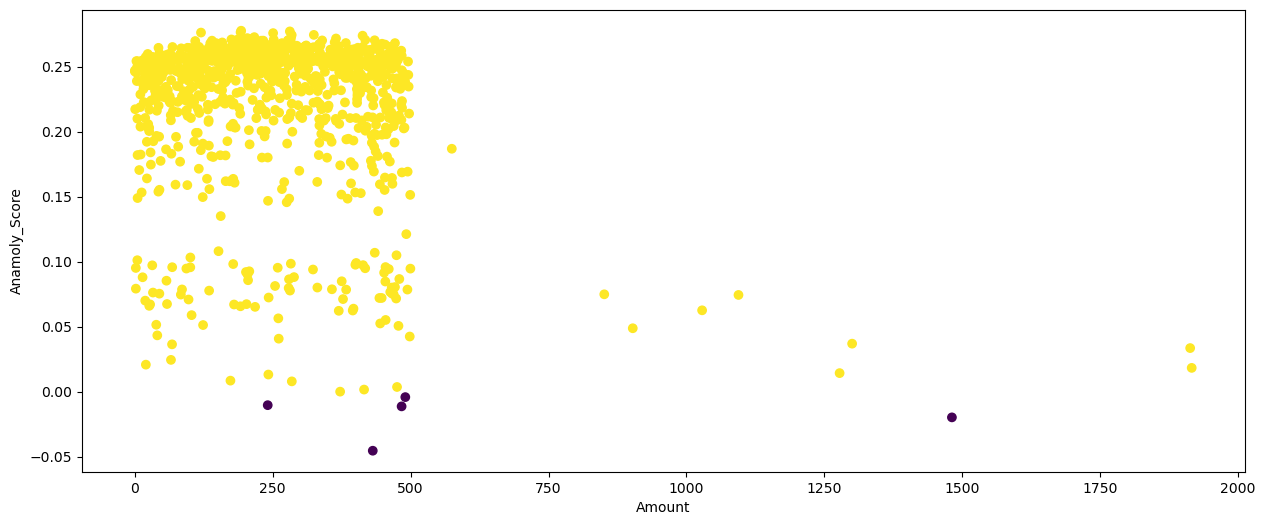

In [92]:
plt.figure(figsize = (15,6))
plt.scatter(X['Amount'], X['Anamoly_scores'], c = X['Anamoly'],cmap ='viridis')
plt.xlabel('Amount')
plt.ylabel('Anamoly_Score')
plt.show()